In [124]:
import numpy as np
import matplotlib.pyplot as plt
import mplstyles

import pint
ureg = pint.UnitRegistry()
%matplotlib inline

### A

In [125]:
i = 20 * ureg.deg
G = 900 / ureg.mm
g = 1/G
m = 1
l1 = 5100 * ureg.angstrom
l2 = 8900 * ureg.angstrom
print 'g =', g

g = 0.00111111111111 millimeter


In [128]:
def ang_diffract(lamda, i=i, m=m, g=g):
    return np.arcsin( m*lamda / g  - np.sin(i.to(ureg.radian)) )

def angular_dispersion(lamda, g=g, i=i, m=m):
    j = ang_diffract(lamda, i, m, g)
    return g*np.cos(j.to(ureg.radian)) / m

In [129]:
for lam in [l1, l2]:
    ang = angular_dispersion(lam)
    print 'Angular dispersion at {0}: {1}'.format(lam, ang.to(ureg.angstrom))

Angular dispersion at 5100 angstrom: 11034.8254174 angstrom
Angular dispersion at 8900 angstrom: 9871.62970252 angstrom


/home/jhaux/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


In [130]:
lamda = np.linspace(4000, 9000, num=1000) * ureg.angstrom
ang = angular_dispersion(lamda).to(ureg.angstrom)

/home/jhaux/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


/home/jhaux/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


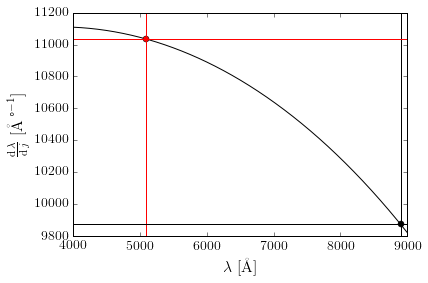

In [131]:
fig, ax = plt.subplots(1,1)
ax.plot(lamda, ang, '-k')
ax.plot(l1, angular_dispersion(l1).to(ureg.angstrom), 'or')
ax.plot(l2, angular_dispersion(l2).to(ureg.angstrom), 'ok')
ax.axvline(l1.m, color='r')
ax.axvline(l2.m, color='k')
ax.axhline(angular_dispersion(l1).to(ureg.angstrom).m, color='r')
ax.axhline(angular_dispersion(l2).to(ureg.angstrom).m, color='k')

ax.set_xlabel('$\\lambda$ $[\\si{\\angstrom}]$')
ax.set_ylabel('$\\frac{\\operatorname{d}\\lambda}{\\operatorname{d}j}$ $[\\si{\\angstrom\\per\\degree}]$')

### B

In [98]:
G = 600 / ureg.mm
g = 1/G
l = 2 * ureg.cm
lam = 6200 * ureg.angstrom

In [99]:
R = g / lam
print R.to(ureg.dimensionless).m

2.68817204301


In [100]:
i = 45 * ureg.degree
m = 2

In [101]:
lam = g*np.sin(i.to(ureg.radian))/m
print 'lam = ', lam.to(ureg.angstrom)

lam =  5892.55650989 angstrom


### C

In [105]:
R = 2300
lam = 8000 * ureg.angstrom
l = 1 * ureg.cm

$R_{max} = \frac{2l}{\lambda}$

In [123]:
# R = m * N
# R_{max} = 2l/lambda = 2 * N * d / lambda  <=> l = R/2 * lambda// g = grid spacing
# Nd = l <=> d = l/N = R/2*lambda / N = R/2*lambda / (R/m) = lambda/(2m)
# g = 1/d

#R = 1.22*lam / D
g = R * lam
G = 1/g
print G.to(1/ureg.mm)

0.54347826087 1 / millimeter
